# Electric Circuit Usage Analysis
This workbook looks at usage patterns for a selection of charging locations near Colin and Ryan

First lets get the data loaded and look at the table so we can understand what information is available to us...

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('charger_status2.csv')
df.head()

,timestamp,name,status,availableCount,count
0,2024-11-29T21:13:20.557540,5034 | BSR | PMR | 5223 St-Laurent,inUse,0,2
1,2024-11-29T21:13:20.557540,5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie,inUse,0,2
2,2024-11-29T21:13:20.557540,Allied - 5455 de Gaspé,available,2,2
3,2024-11-29T21:13:20.557540,Allied - 5445 de Gaspé,available,1,2
4,2024-11-29T21:13:20.557540,5026 | BSR | PMR | 5561 St-Dominique,available,1,2


#### Lets look at the general fraction of each hour that any charger is available 

This gives us the probability of any of the chargers being free within that hour to give us a general sense of business over the time period we've logged. Its not practically helpful as its combining all chargers into one availability fraction.

/var/folders/xy/dgbcwd9w8xlfn9008k8yxk8h0000gp/T/ipykernel_26515/4031026872.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df.resample('H', on='timestamp').apply(lambda x: x['in_use'].mean())


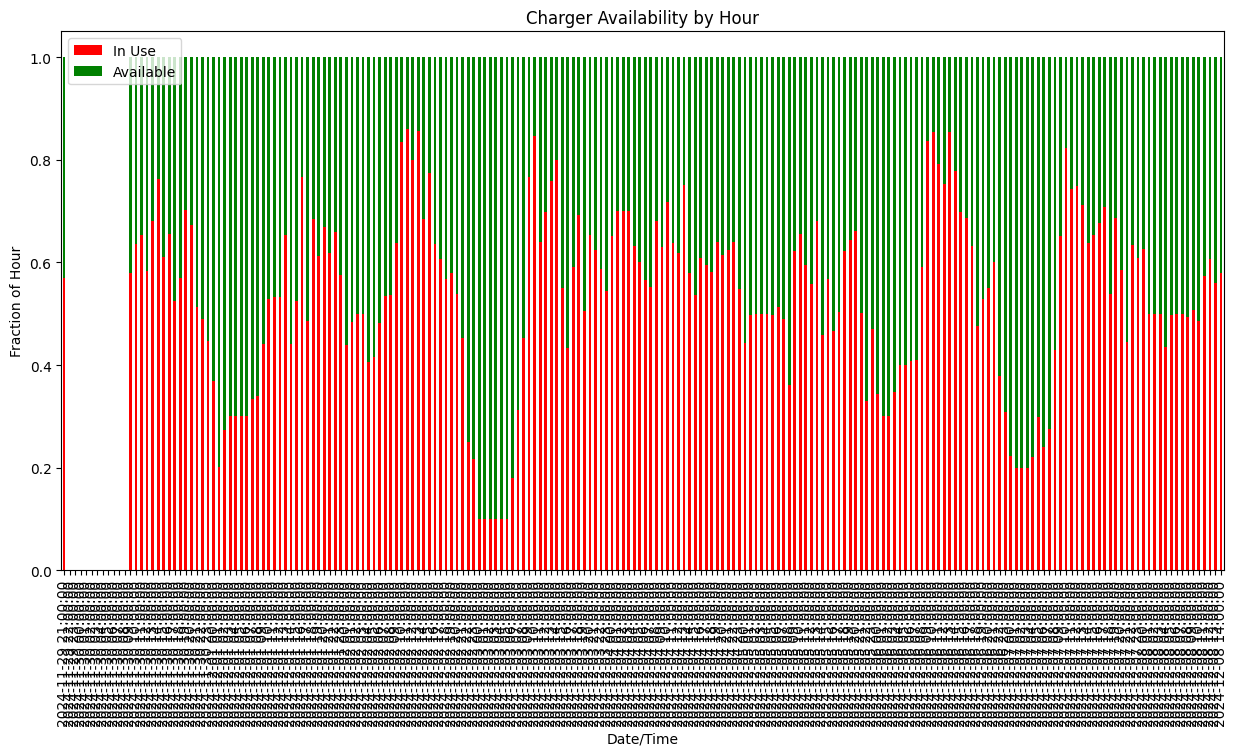

In [42]:
# Convert the timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601')

# Drop rows with NaT values in the timestamp column
df = df.dropna(subset=['timestamp'])

# Create a new column to indicate whether the available count is 0 or greater than 0
df['in_use'] = df['availableCount'] == 0

# Resample the data by hour and calculate the fraction of time for each condition
hourly_data = df.resample('H', on='timestamp').apply(lambda x: x['in_use'].mean())

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'in_use': hourly_data,
    'available': 1 - hourly_data
})

# Plot the stacked bar chart
plot_data.plot(kind='bar', stacked=True, figsize=(15, 7), color=['red', 'green'])
plt.xlabel('Date/Time')
plt.ylabel('Fraction of Hour')
plt.title('Charger Availability by Hour')
plt.legend(['In Use', 'Available'])
plt.show()

## This is the list of chargers we have:

In [43]:
# Print a distinct list of all the chargers
unique_chargers = df['name'].unique()
print("Distinct list of all chargers:")
print(unique_chargers)

Distinct list of all chargers:
['5034 | BSR | PMR | 5223 St-Laurent'
 '5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie'
 'Allied - 5455 de Gaspé' 'Allied - 5445 de Gaspé'
 '5026 | BSR | PMR | 5561 St-Dominique' '5013 | BSR | PMR | 5055 Rivard'
 '5035 | BSR | PMR | 5110 Chambord' '5014 | BSR | PMR | 5333 Papineau'
 '5015 | BSR | PMR | 4801 Papineau' '5022 | BSR | PMR | 4490 Fabre']


#### We'll now apply a mapping of the user Ryan or Colin to those chargers

In [44]:
# Create a mapping dictionary
charger_mapping = {
    "5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie": "Ryan",
    "5013 | BSR | PMR | 5055 Rivard": "Ryan",
    "5014 | BSR | PMR | 5333 Papineau": "Ryan",
    "5015 | BSR | PMR | 4801 Papineau": "Ryan",
    "5022 | BSR | PMR | 4490 Fabre": "Ryan",
    "5026 | BSR | PMR | 5561 St-Dominique": "Colin",
    "5034 | BSR | PMR | 5223 St-Laurent": "Colin",
    "5035 | BSR | PMR | 5110 Chambord": "Colin",
    "Allied - 5445 de Gaspé": "Colin",
    "Allied - 5455 de Gaspé": "Colin"
}

# Add a new column to the DataFrame
df['assigned_to'] = df['name'].map(charger_mapping)

# Verify the new column
print(df[['name', 'assigned_to']].drop_duplicates())

                                                name assigned_to
0                 5034 | BSR | PMR | 5223 St-Laurent       Colin
1   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie        Ryan
2                             Allied - 5455 de Gaspé       Colin
3                             Allied - 5445 de Gaspé       Colin
4               5026 | BSR | PMR | 5561 St-Dominique       Colin
5                     5013 | BSR | PMR | 5055 Rivard        Ryan
24                  5035 | BSR | PMR | 5110 Chambord       Colin
25                  5014 | BSR | PMR | 5333 Papineau        Ryan
26                  5015 | BSR | PMR | 4801 Papineau        Ryan
27                     5022 | BSR | PMR | 4490 Fabre        Ryan


#### This plot shows a 24 hour x axis, which is data from any day to show an hourly pattern. This chart is repeated for Ryan and Colin's chargers to see when they are typically busy.

/var/folders/xy/dgbcwd9w8xlfn9008k8yxk8h0000gp/T/ipykernel_26515/4060486156.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', num_chargers)


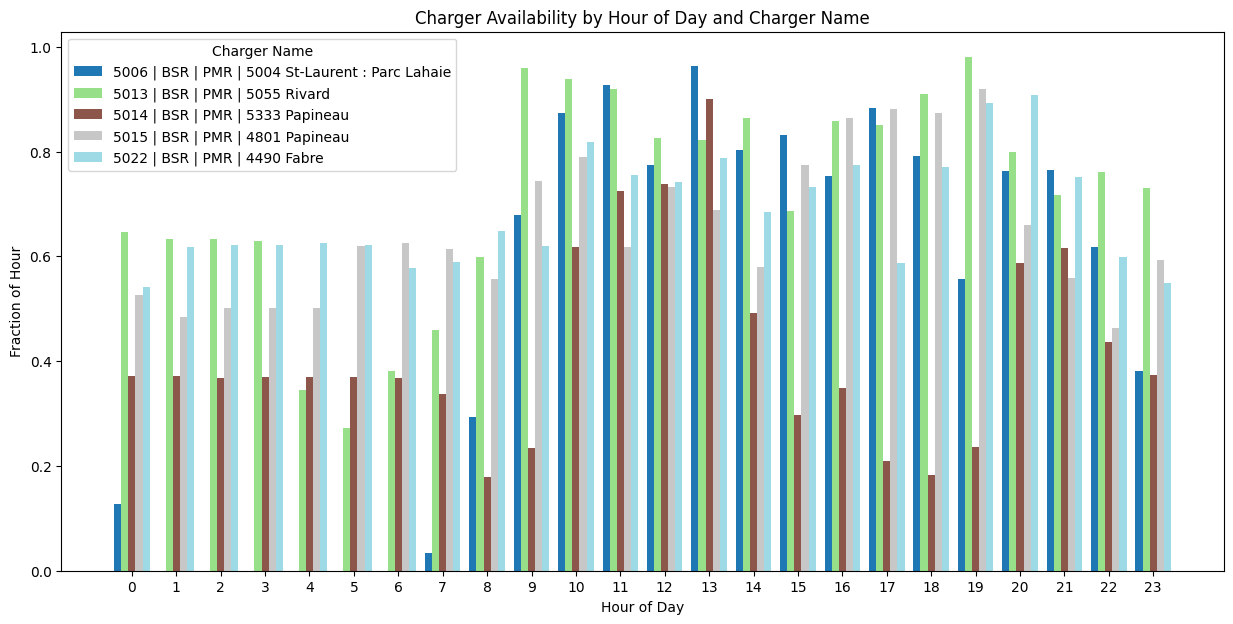

In [ ]:


# Create a new column to indicate whether the available count is 0 or greater than 0
df['in_use'] = df['availableCount'] == 0

# Extract the hour of the day from the timestamp
df['hour_of_day'] = df['timestamp'].dt.hour

# Filter the DataFrame to include only the "Ryan" chargers
df_ryan = df[df['assigned_to'] == 'Ryan']

# Filter the DataFrame to include only the "Colin" chargers
df_colin = df[df['assigned_to'] == 'Colin']

# Group the data by charger name and hour of the day, and calculate the fraction of time for each condition
hourly_data_by_charger_ryan = df_ryan.groupby(['name', 'hour_of_day'])['in_use'].mean().unstack(level=0)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 7))

# Define the number of chargers and the width of each bar
num_chargers = len(hourly_data_by_charger_ryan.columns)
bar_width = 0.8 / num_chargers

# Define the colors for each charger
colors = plt.cm.get_cmap('tab20', num_chargers)

# Plot each charger separately
for i, charger in enumerate(hourly_data_by_charger_ryan.columns):
    x = np.arange(len(hourly_data_by_charger_ryan.index)) + i * bar_width
    ax.bar(x, hourly_data_by_charger_ryan[charger], width=bar_width, color=colors(i), label=charger)

# Set the x-axis labels
ax.set_xticks(np.arange(len(hourly_data_by_charger_ryan.index)) + bar_width * (num_chargers - 1) / 2)
ax.set_xticklabels(hourly_data_by_charger_ryan.index)

plt.xlabel('Hour of Day')
plt.ylabel('Fraction of Hour IN USE')
plt.title('Charger Usage by Hour of Day (Ryan Chargers)')
plt.legend(title='Charger Name')
plt.xticks(rotation=0)
plt.show()

/var/folders/xy/dgbcwd9w8xlfn9008k8yxk8h0000gp/T/ipykernel_26515/867990017.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', num_chargers)


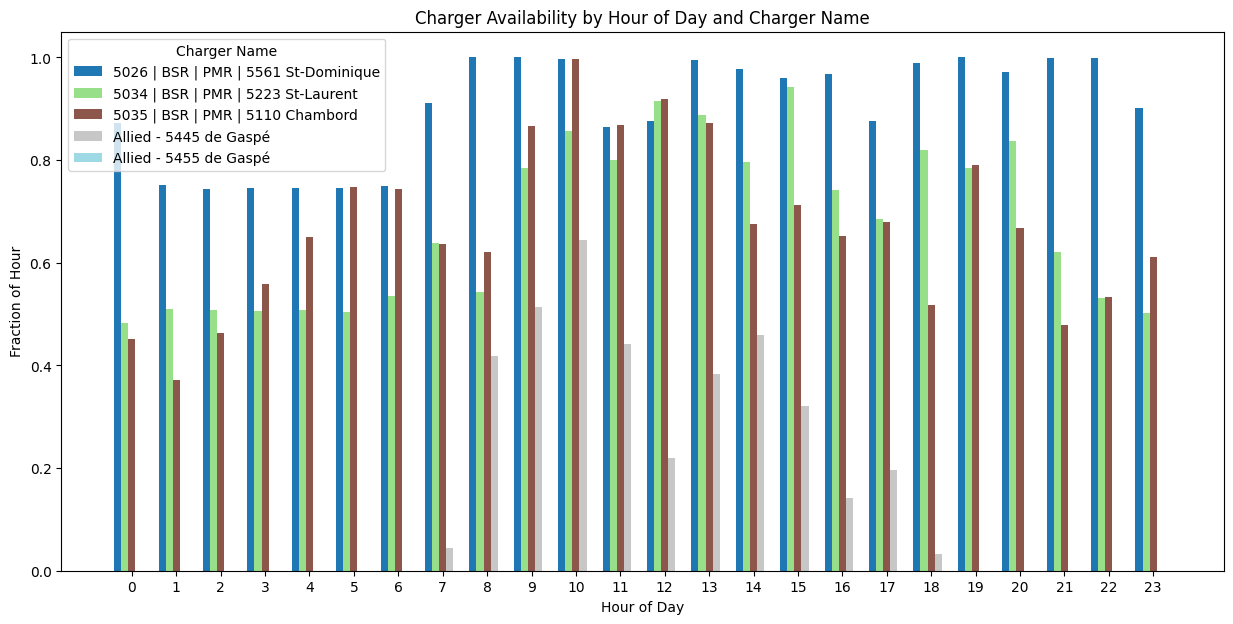

In [ ]:
# Group the data by charger name and hour of the day, and calculate the fraction of time for each condition
hourly_data_by_charger_colin = df_colin.groupby(['name', 'hour_of_day'])['in_use'].mean().unstack(level=0)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(15, 7))

# Define the number of chargers and the width of each bar
num_chargers = len(hourly_data_by_charger_colin.columns)
bar_width = 0.8 / num_chargers

# Define the colors for each charger
colors = plt.cm.get_cmap('tab20', num_chargers)

# Plot each charger separately
for i, charger in enumerate(hourly_data_by_charger_colin.columns):
    x = np.arange(len(hourly_data_by_charger_colin.index)) + i * bar_width
    ax.bar(x, hourly_data_by_charger_colin[charger], width=bar_width, color=colors(i), label=charger)

# Set the x-axis labels
ax.set_xticks(np.arange(len(hourly_data_by_charger_colin.index)) + bar_width * (num_chargers - 1) / 2)
ax.set_xticklabels(hourly_data_by_charger_colin.index)

plt.xlabel('Hour of Day')
plt.ylabel('Fraction of Hour IN USE')
plt.title('Charger Usage by Hour of Day (Colin Chargers)')
plt.legend(title='Charger Name')
plt.xticks(rotation=0)
plt.show()

In [55]:
# Identify charging sessions
df['session_start'] = (df['availableCount'].shift(1) > df['availableCount']) & (df['availableCount'] < 2)
df['session_end'] = (df['availableCount'].shift(1) < df['availableCount']) & (df['availableCount'] > 0)

# Filter out rows where no session starts or ends
sessions = df[(df['session_start']) | (df['session_end'])]

# Debug: Check the session start and end times
# print("\nSessions with Start and End Flags:")
# print(sessions[['timestamp', 'name', 'availableCount', 'session_start', 'session_end']].head(20))

In [ ]:
# Initialize lists to store session data
session_data = []

# Iterate through the sessions to calculate durations
for name, group in sessions.groupby('name'):
    start_time = None
    for _, row in group.iterrows():
        if row['session_start']:
            start_time = row['timestamp']
        elif row['session_end'] and start_time is not None:
            duration = row['timestamp'] - start_time
            session_data.append({'name': name, 'duration': duration})
            start_time = None

# Create a DataFrame from the session data
session_durations = pd.DataFrame(session_data)

# Debug: Check the calculated durations
print("\nSession Durations:")
print(session_durations.head(10))


Session Durations:
                                                name               duration
0   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 04:43:40.256792
1   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:36:00.212131
2   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:21:56.277073
3   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 02:21:00.286126
4   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:22:57.983162
5   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 01:03:57.236670
6   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 03:57:29.041120
7   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:52:46.146201
8   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 01:09:06.076612
9   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 02:52:51.760313
10  5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:02:00.068529
11  5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 01:01:01

In [64]:
# Calculate the minimum, maximum, and mean charging duration for each station
min_durations = session_durations.groupby('name')['duration'].min().reset_index()
max_durations = session_durations.groupby('name')['duration'].max().reset_index()
mean_durations = session_durations.groupby('name')['duration'].mean().reset_index()

# Convert durations to minutes
min_durations['min_duration'] = min_durations['duration'].dt.total_seconds() / 60
max_durations['max_duration'] = max_durations['duration'].dt.total_seconds() / 60
mean_durations['mean_duration'] = mean_durations['duration'].dt.total_seconds() / 60

# Merge min, max, and mean durations into a single DataFrame
durations = pd.merge(min_durations[['name', 'min_duration']], max_durations[['name', 'max_duration']], on='name')
durations = pd.merge(durations, mean_durations[['name', 'mean_duration']], on='name')

# Debug: Check the min, max, and mean durations
print("\nMin, Max, and Mean Charging Durations per Station:")
print(durations)


Min, Max, and Mean Charging Durations per Station:
                                               name  min_duration  \
0  5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie      0.002748   
1                    5013 | BSR | PMR | 5055 Rivard     11.025420   
2                  5014 | BSR | PMR | 5333 Papineau      1.018208   
3                  5015 | BSR | PMR | 4801 Papineau     10.055356   
4                     5022 | BSR | PMR | 4490 Fabre      1.926271   
5              5026 | BSR | PMR | 5561 St-Dominique     17.006400   
6                5034 | BSR | PMR | 5223 St-Laurent      0.068067   
7                  5035 | BSR | PMR | 5110 Chambord      1.922628   
8                            Allied - 5445 de Gaspé      0.176254   
9                            Allied - 5455 de Gaspé     77.902781   

   max_duration  mean_duration  
0    414.962680      90.269335  
1    891.098410     219.715071  
2    667.294297     146.388257  
3    802.192711     224.060938  
4    712.022209     182

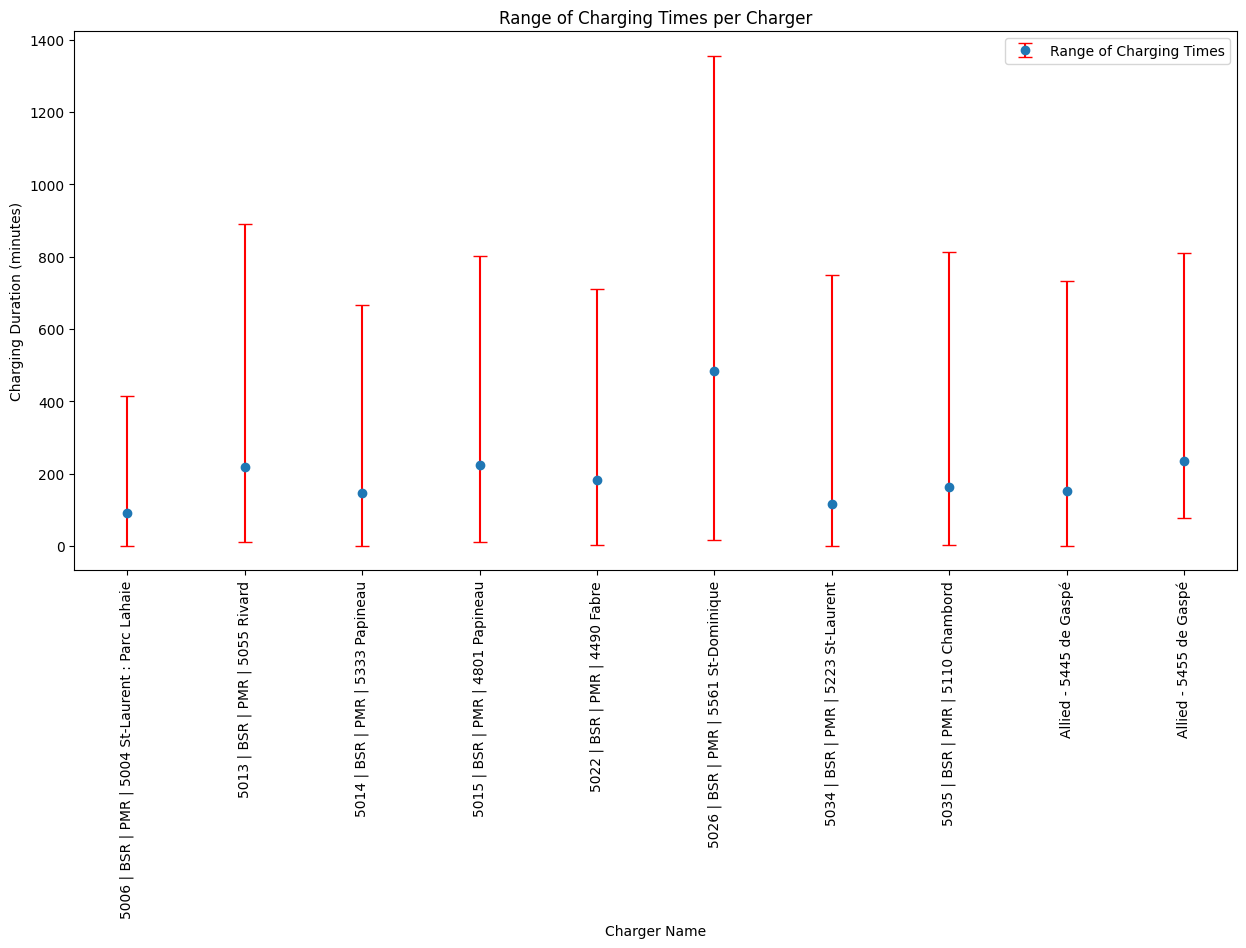

In [65]:
# Plot the range of charging times for each charger
fig, ax = plt.subplots(figsize=(15, 7))

# Plot min and max durations as error bars with the mean as the central point
ax.errorbar(durations['name'], durations['mean_duration'], yerr=[durations['mean_duration'] - durations['min_duration'], durations['max_duration'] - durations['mean_duration']], fmt='o', ecolor='red', capsize=5, label='Range of Charging Times')

plt.xlabel('Charger Name')
plt.ylabel('Charging Duration (minutes)')
plt.title('Range of Charging Times per Charger')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [66]:
# Convert durations to minutes for easier bucketing
session_durations['duration_minutes'] = session_durations['duration'].dt.total_seconds() / 60

# Debug: Check the session durations
print("\nSession Durations in Minutes:")
print(session_durations.head(20))


Session Durations in Minutes:
                                                name               duration  \
0   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 04:43:40.256792   
1   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:36:00.212131   
2   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:21:56.277073   
3   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 02:21:00.286126   
4   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:22:57.983162   
5   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 01:03:57.236670   
6   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 03:57:29.041120   
7   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:52:46.146201   
8   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 01:09:06.076612   
9   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 02:52:51.760313   
10  5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:02:00.068529   
11  5006 | BSR | PMR 

In [67]:
# Define the bucket edges (in minutes)
bins = [0, 10, 30, 60, 120, 240, 480, 960, 1440]  # Example bucket sizes

# Create a new column for the bucket labels
session_durations['duration_bucket'] = pd.cut(session_durations['duration_minutes'], bins=bins, right=False)

# Debug: Check the bucketed durations
print("\nSession Durations with Buckets:")
print(session_durations.head(20))


Session Durations with Buckets:
                                                name               duration  \
0   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 04:43:40.256792   
1   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:36:00.212131   
2   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:21:56.277073   
3   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 02:21:00.286126   
4   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:22:57.983162   
5   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 01:03:57.236670   
6   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 03:57:29.041120   
7   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:52:46.146201   
8   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 01:09:06.076612   
9   5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 02:52:51.760313   
10  5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie 0 days 00:02:00.068529   
11  5006 | BSR | PM

In [70]:
# Count the number of sessions in each bucket for each charger
bucket_counts = session_durations.groupby(['name', 'duration_bucket']).size().unstack(fill_value=0)

# Convert the interval objects to strings
bucket_counts.columns = bucket_counts.columns.astype(str)

# Debug: Check the converted bucket counts
print("\nBucket Counts with String Labels:")
print(bucket_counts)



Bucket Counts with String Labels:
duration_bucket                                   [0, 10)  [10, 30)  [30, 60)  \
name                                                                            
5006 | BSR | PMR | 5004 St-Laurent : Parc Lahaie        4         9        13   
5013 | BSR | PMR | 5055 Rivard                          0         6         4   
5014 | BSR | PMR | 5333 Papineau                        2         4         5   
5015 | BSR | PMR | 4801 Papineau                        0         5         1   
5022 | BSR | PMR | 4490 Fabre                           4         1         0   
5026 | BSR | PMR | 5561 St-Dominique                    0         1         1   
5034 | BSR | PMR | 5223 St-Laurent                      7        13        15   
5035 | BSR | PMR | 5110 Chambord                        2         4         8   
Allied - 5445 de Gaspé                                  1         2         3   
Allied - 5455 de Gaspé                                  0         0       

/var/folders/xy/dgbcwd9w8xlfn9008k8yxk8h0000gp/T/ipykernel_26515/3069637603.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_counts = session_durations.groupby(['name', 'duration_bucket']).size().unstack(fill_value=0)


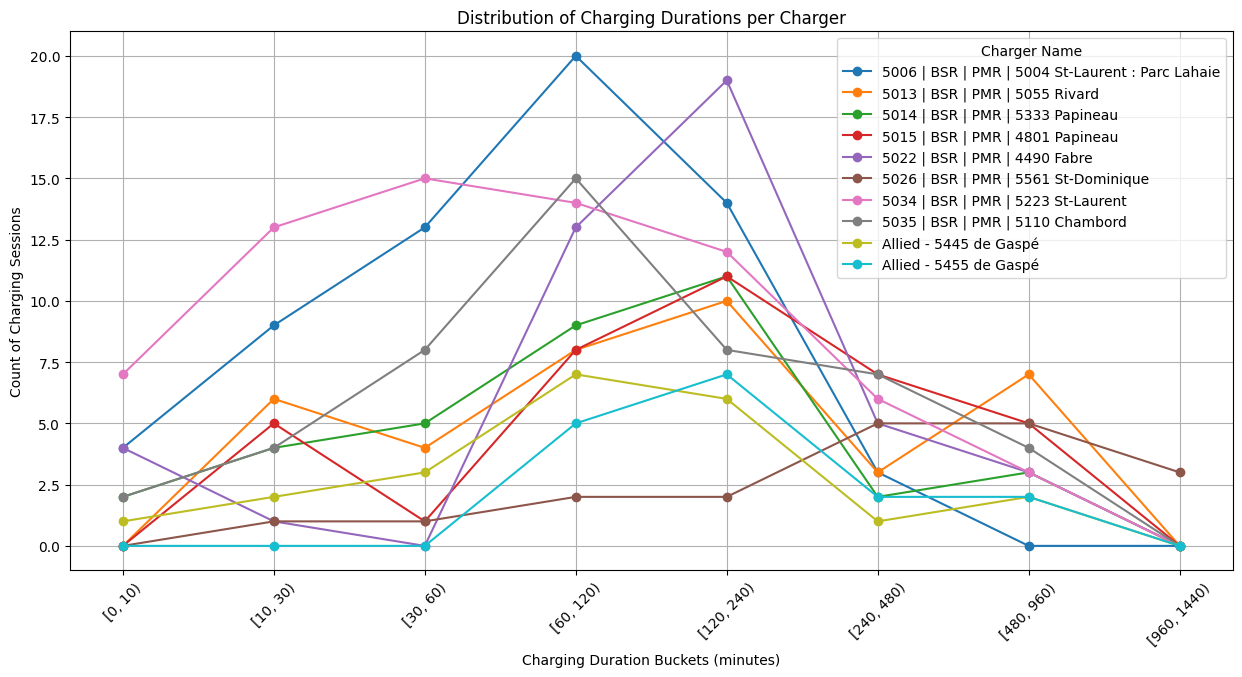

In [71]:
# Plot the distribution of charging durations for each charger
fig, ax = plt.subplots(figsize=(15, 7))

# Plot each charger separately
for charger in bucket_counts.index:
    ax.plot(bucket_counts.columns, bucket_counts.loc[charger], marker='o', label=charger)

plt.xlabel('Charging Duration Buckets (minutes)')
plt.ylabel('Count of Charging Sessions')
plt.title('Distribution of Charging Durations per Charger')
plt.legend(title='Charger Name')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()